# Lecture 14 Dimension Reduction: Manifold Learning 

As the simplest dimension reduction method, PCA is a linear transformation approach from $\mathbb{R}^{p}$ to $\mathbb{R}^{k}$. In this lecture we will briefly mention some nonlinear dimension reduction techniques, which can be classified into one subfield of dimention reduction research -- [manifold learning](https://scikit-learn.org/stable/modules/manifold.html#manifold).

>**Data Manifold Assumption**: many real-world datasets can be approximately represented as lower dimensional manifolds that are embedded in a higher dimensional space.

Imagine the rope (intrinsically 1D) or paper (intrinsically 2D) are folded or distorted, so that they (unnecessarily) live the space in 3D -- what manifold learning does is to "unfold" them, revealing their intrisic dimension. 

A more detailed and systematic tutorial can be found [here](https://github.com/drewwilimitis/Manifold-Learning) -- helpful reference for you to write the final project.

In [25]:
from sklearn.datasets import load_digits
X,y = load_digits(return_X_y=True)

## [Multidimensional scaling (MDS)](https://en.wikipedia.org/wiki/Multidimensional_scaling)

**Basic intuition:** In original high dimensional data, we can construct $n\times n$ dissimilarity (distance) matrix $d_{ij}=\mathbf{d}(\mathbf{x}^{i},\mathbf{x}^{j})$. We aim to optimize the low-dimensional embedding $\mathbf{y}^{i}$ such that the distance in the low-dimensional $\mathbb{R}^{k}$ approximates the distance in high-dimensional space, i.e. $||\mathbf{y}^{(i)}-\mathbf{y}^{(j)}||\approx d_{ij}$. 

**How to do it:** many practical algorithms are available. Can be based on analytical solution + eigen decomposition (known as **classical MDS**) or numerical optimization (**metric MDS**). It is worth noting that in classical MDS, if the both $d_{ij}$ in high-dimensional space and norm in low-dimensional space is chosen as the euclidean disance, then it is equivalent to PCA.

In sklearn, the default option is [metric MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html), and the distance are by defualt euclidean.

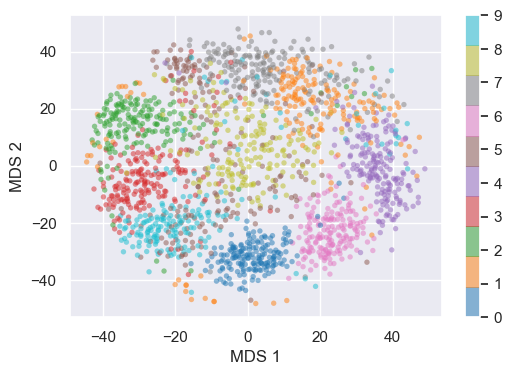

In [26]:
from sklearn.manifold import MDS
mds = MDS(n_jobs = -1) # use all the processors in our computer!
X_mds = mds.fit_transform(X)


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_mds[:, 0], X_mds[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.colorbar();

## [Isomap](https://en.wikipedia.org/wiki/Isomap)

**Basic intuition:** In high dimensional data, the $n\times n$ dissimilarity (distance) matrix $d_{ij}$ is chosen as the [**Geodesic distance**](https://en.wikipedia.org/wiki/Geodesic) on data manifold (imagine: shortest curve to connect two points on the surface). Then we can use classical MDS to embed the data into 2D space. This method is theoretically very impactful, published in [Science](https://web.mit.edu/cocosci/isomap/isomap.html) and marks the beginning of modern manifold learning (together with LLE, another paper published in the same journal simultaneously).

**How to do it**: In high dimensional data, using kNN graph to approximate the data manifold, and using shortest path algorithm in graph theory to compute the Geodesic distance. With the constructed distance, then apply classical MDS to reduce the dimension.

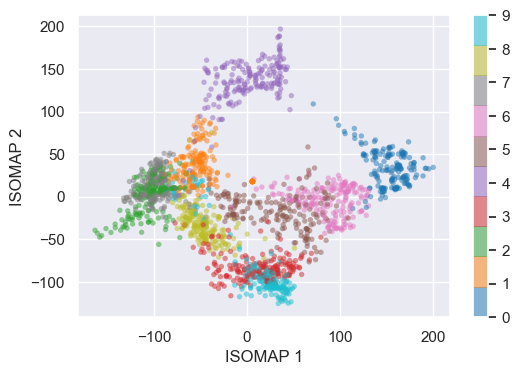

In [27]:
from sklearn.manifold import Isomap
isomap = Isomap(n_jobs = -1)
X_isomap = isomap.fit_transform(X)


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('ISOMAP 1')
plt.ylabel('ISOMAP 2')
plt.colorbar();

## [t-distributed stochastic neighbor embedding (tSNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

tSNE is the de facto most popular dimension reduction method in current data science research. It is great for visualization of high-dimensional data, mainly because it alleviates the "crowding" problem in the low-dimensional embedding, by introducing the t-distribution kernel (heavier tail than gaussian). 

**Basic intuition**: The random walk on high-dimensional data should be similar to the random walk in the embedded low-dimensional space.

**How to do it**: Construct the transition probability matrices of random walk in high-dimensional (denoted by $P$, which is $n\times n$ matrix) and low-dimensional space (denoted by $Q$), with Gaussian and t-distribution kernels respectively. Note that $Q$ contains the variable $y_{1},...,y_{n}\in \mathbb{R}^{k}$, i.e. reduced coordinates. tSNE aims to find the best $y_{1},...,y_{n}\in\mathbb{R}^{k}$ that minimizes the "distance" (KL divergence) between $P$ and $Q$ -- using gradient descent.

A very cool website to guide the choice of parameters in tSNE can also be found [here](https://distill.pub/2016/misread-tsne/)

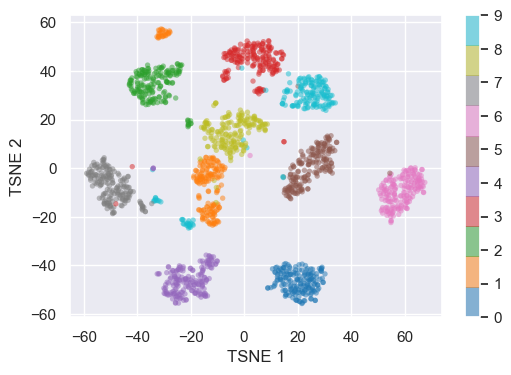

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_jobs = -1)
X_tsne = tsne.fit_transform(X)


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

There are many strategies in real applications of dimension reduction. For example, we can do manifold learning in a sequential way.

(1797, 9)


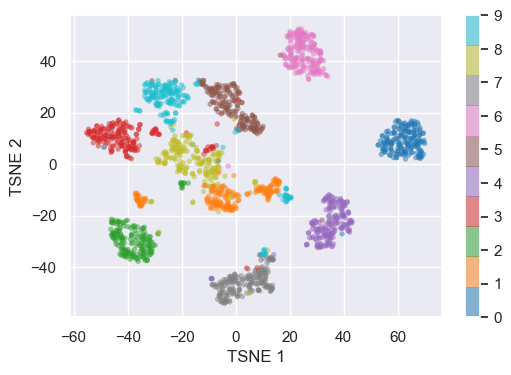

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.7) # find pc that explains 70% of total variacne
X_pca = pca.fit_transform(X)
print(X_pca.shape)
X_tsne = tsne.fit_transform(X_pca) # tsne on PCA results

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

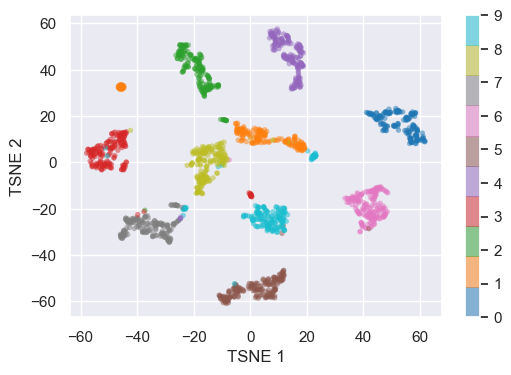

In [21]:
isomap = Isomap(n_jobs = -1, n_components= 10)
X_isomap = isomap.fit_transform(X)
X_tsne = tsne.fit_transform(X_isomap) # tsne based on Isomap results

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();